# Project: Investigate a Dataset - Exploratory Study of 10,000 movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset, known as The Movie Dataset (tmDd) consists of approximately 10,000 movies. There are a total of 21 columns: id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj. The last two columns (dubet_adj, revenue_adj) were renamed along the data wrangling process.


### Question(s) for Analysis

In this analysis, the following four research questions will be explored:
- Is there a correlation between movie budget and its popularity?
- What are the movies with the highest and the lowest revenues?
- Is there a difference in the cost between action movies and family movies released in 2000?
- Do movies increase their budget across time? (e.g., more recent movies have a higher cost)


In [2]:
import pandas as pd
import numpy as np

<a id='wrangling'></a>
## Data Wrangling


### General Properties

To explore and better understand the dataset, below some analyses were conducted:

In [3]:
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
print(df.shape)
print(df.info())
print(df.describe())
print(df.head(5))



(10866, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release


### Data Cleaning
 

The following changes were made to the dataset in order to improve the data quality:
- The genre column was modified since its values were separated by pipe characters. While I would ideally have created one column for each genre, I wasn't able to figure out the code for that, so I only kept the first genre
- Two columns ended with “_adj”, they were modified and the "_adj" was removed
- For revenue and budget, there is no need to know the decimals, hence they will be converted to int


In [4]:
# Genre column modification:
# Since I got an error message related to null numbers,
# I renamed the null cells

print(df.genres.isnull().sum())
df['genres']=df['genres'].fillna('No genre |')
print(df.genres.isnull().sum())
print(type(df['genres'][0]))

df['genres'] = df['genres'].apply(lambda x: x[:x.find('|')] + '')
df.head(10)

23
0
<class 'str'>


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [5]:
# Remove "_adj"

df.rename(columns={'budget_adj':'budget_inflation'}, inplace = True)
df.rename(columns={'revenue_adj':'revenue_inflation'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10866 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# Change data type from float to int

df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df.head(10)


23
0
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10866 non-null  object 
 14  production_companies  9836 non-null   object 
 15  

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_inflation,revenue_inflation
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


<a id='eda'></a>
## Exploratory Data Analysis

The following section provides the analysis for each research question:


### Research Question 1  - Budget & Popularity

425000000
0
14625701.09414688


Text(0.5, 1.0, 'Scatter Plot')

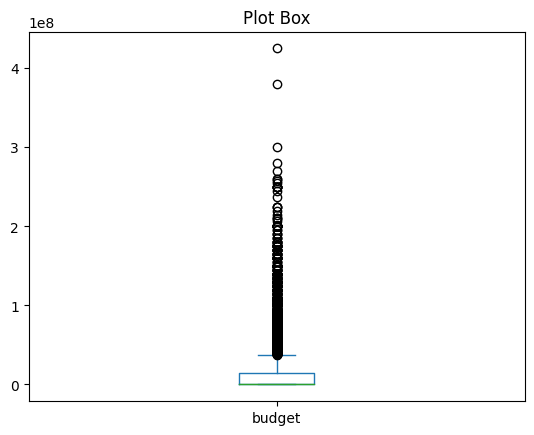

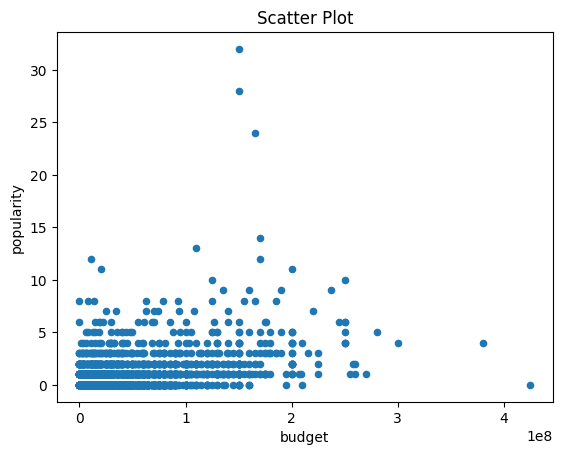

In [20]:
# Preliminary question: What are the characteristics of movie budget? (e.g., min, max, mean)

import matplotlib.pyplot as plt

df['budget'].plot.box();
plt.title("Plot Box", fontdict=None, loc='center', pad=None)

print(df['budget'].max())
print(df['budget'].min())
print(df['budget'].mean())

# The research question is the following: 
# Is there a correlation between movie budget and its popularity?

df['popularity'] = df['popularity'].astype(int)
df.plot(x='budget', y='popularity', kind='scatter');

plt.title("Scatter Plot", fontdict=None, loc='center', pad=None)


The box plot shows us the **distribution of the budget** spent per movie. Based on the box plot, we can infer that there were a couple of outliers, these are movies that costed significantly more than the rest.

Based on the histogram between **movie's popularity and budget**, there is no clear link between the relationship of movie's popularity and how much it costed to produce them.

### Research Question 2 - Highest and lowest revenues

In [56]:
# The research question is the following: 
# What are the movies with the highest and the lowest revenues?

max_revenue = df['revenue'].max()
print(max_revenue)

min_revenue = df['revenue'].min()
print(min_revenue)

df_movie_max_revenue = df[df['revenue'] == 2781505847]
print(df_movie_max_revenue)

df_movie_min_revenue = df[df['revenue'] == 0]
print(df_movie_min_revenue)


2781505847
0
         id    imdb_id  popularity     budget     revenue original_title  \
1386  19995  tt0499549           9  237000000  2781505847         Avatar   

                                                   cast  \
1386  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...   

                         homepage       director                      tagline  \
1386  http://www.avatarmovie.com/  James Cameron  Enter the World of Pandora.   

      ...                                           overview runtime  \
1386  ...  In the 22nd century, a paraplegic Marine is di...     162   

                                        genres  \
1386  Action|Adventure|Fantasy|Science Fiction   

                                   production_companies release_date  \
1386  Ingenious Film Partners|Twentieth Century Fox ...     12/10/09   

     vote_count  vote_average  release_year    budget_adj   revenue_adj  
1386       8458           7.1          2009  2.408869e+08  2.827124e+09  

[1 rows x 21

### Research Question 3 - Action and Family Movies

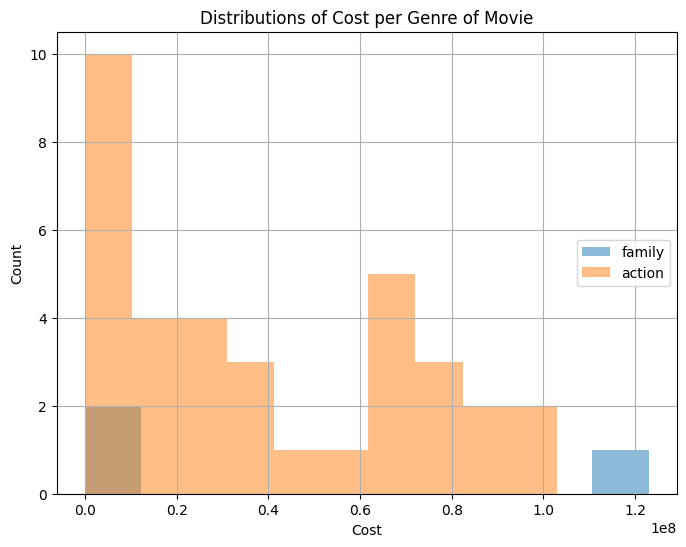

In [47]:
# the research question is the following: 
# Is there a difference in the cost between action movies and family movies released in 2000?

df_f = df[(df['genres'] == 'Family') & (df['release_year'] == 2000)]

df_a = df[(df['genres'] == 'Action') & (df['release_year'] == 2000)]

# to understand how to have two conditions, I checked 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing

ax = df_f['budget'].hist(alpha=0.5, figsize=(8, 6), label='family');
df_a['budget'].hist(alpha=0.5, figsize=(8, 6), label='action', ax=ax);
ax.set_title('Distributions of Cost per Genre of Movie')
ax.set_xlabel('Cost');
ax.set_ylabel('Count');
ax.legend(loc='center right');

This histogram displays the **movie cost** of **family**(blue) and **action** movies(orange). Based on the figure we can conclude that while action movies in general have a higher cost than family movies, there is one family movie which had the higest cost.

### Research Question 4 - Budget Across Time

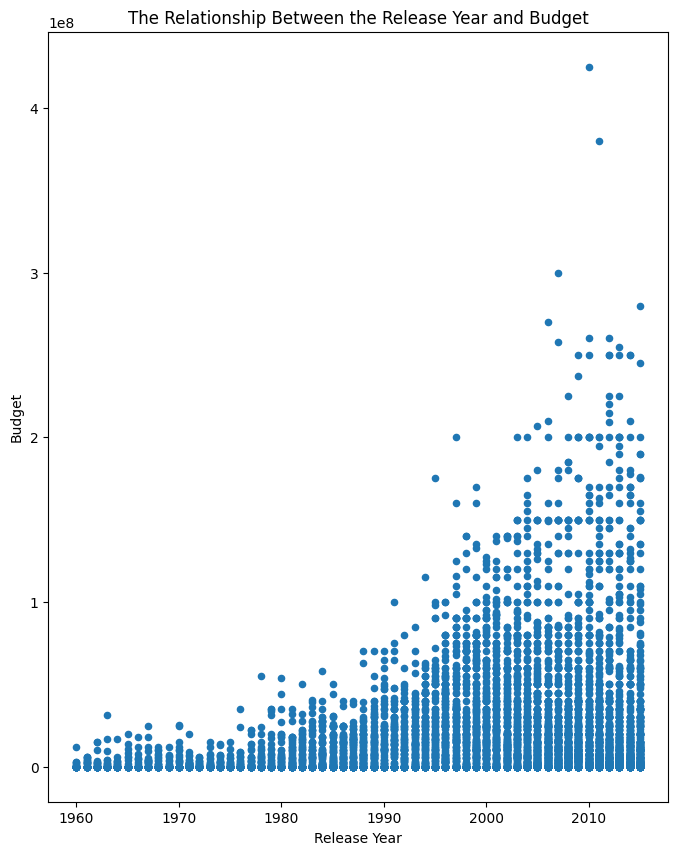

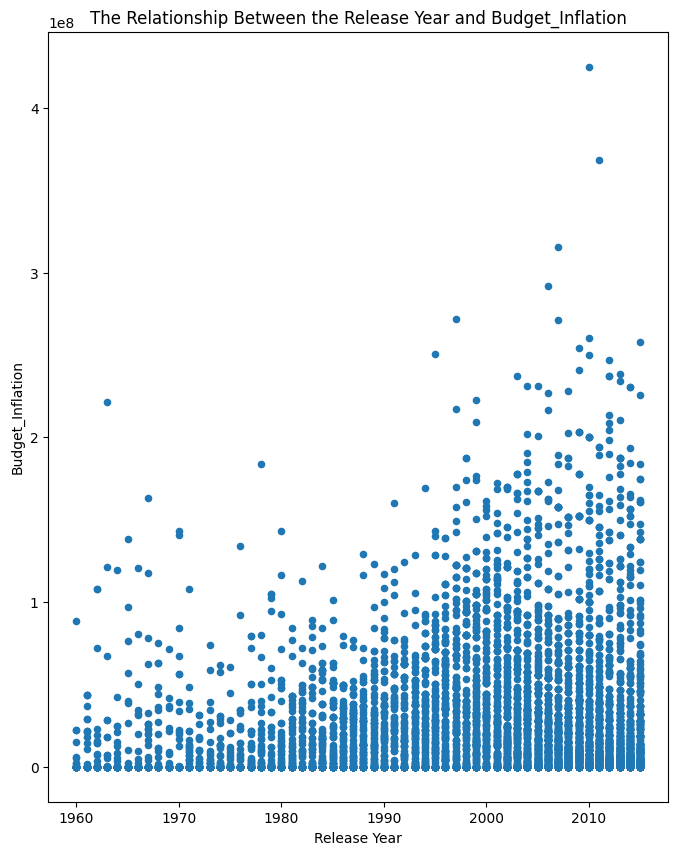

In [13]:
# the research question is the following: 
# Do movies increase their budget across time? (e.g., more recent movies have a higher cost)

import matplotlib.pyplot as plt

def scatter_chart(arg):
    df.plot(x='release_year', y=arg, kind='scatter', xlabel="Release Year", ylabel=f"{arg.title()}",figsize=(8,10))
    plt.title(f"The Relationship Between the Release Year and {arg.title()}")
    plt.show()
    
scatter_chart('budget')
scatter_chart('budget_inflation')
# I searched how to add labels by using: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plot-formatting


These scatter plots show how movies released in more recent year had a higher budget, both accounting for original cost, and for inflated cost.

<a id='conclusions'></a>
## Conclusions

### Findings

Below the findings are described per research question:

##### Reserch question 1 - Is there a link between movie budget and its popularity?

Based on the scatter plot visualization, we can assume that there is no link between budget and popularity. A correlation or regression analysis would have been ideal to test this research question.

##### Reserch question 2 - What are the movies with the highest and the lowest revenues?
Findings shouw that the movie with the largest revenue was Avatar.There were a total of 5 movies which generated 0 revenue. No revenue seems highly unlikely and could be caused by problems with the data quality.

##### Reserch question 3 - Is there a difference in the cost between action movies and family movies released in 2000?

First, it can be observed that there is a higher number of action (compared to family) movies being released. Based on the data, we can also observe an uneven distribution, in which action movies have a broad budget range, while two family movies had a low cost, and one family movie had the highest cost in 2000.
2000 was chosen as an arbitrary number, while I was aiming to investigate more recent dates, there was data missing from some genres for some years, hence the year 2000 was chosen to analyze this research question.

##### Reserch question 4 - Do movies increase their budget across time? (e.g., more recent movies have a higher cost)

Based on the figure we can assume that yes, more recent released movies have a higher budget. This was observed with actual budget and budget based on inflation.


### Limitations

Additional information on the movies might have been useful to better understand their popularity, for instance: country where the movie was produced, number of followers per cast member, number of prizes won by each movie.

Another limitation of this study is that no regressions or moderations were conducted to better understand significant patterns.

In [58]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 470492 bytes to Investigate_a_Dataset.html
